In [1]:
# Portfolio Returns Calculator
# Project 1 - Phase 1 (Python for Finance Foundation)
# Author: Rein / Pixel Sky Solutions

# ---------------------------------
# Step 1 – Setup
# We begin by importing the required Python libraries:
# - yfinance → fetch historical stock price data
# - pandas → data wrangling and portfolio calculations
# - matplotlib & seaborn → visualization
# These will allow us to analyze multi-asset portfolios.
# ---------------------------------

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
# ---------------------------------
# Step 2 – Define Portfolio Holdings
# For this example, we’ll use your real portfolio data.
# Each holding has: Ticker, Shares, Cost Basis, Market Value.
# ---------------------------------
portfolio = {
    "OXY": {"shares": 10000, "cost_basis": 503832},
    "KHC": {"shares": 4600, "cost_basis": 144771},
    "KO": {"shares": 2000, "cost_basis": 125370},
    "BAC": {"shares": 500, "cost_basis": 20488},
    "AAPL": {"shares": 500, "cost_basis": 94538},
    "UNH": {"shares": 250, "cost_basis": 78051},
}

tickers = list(portfolio.keys())

In [4]:
# ---------------------------------
# Step 3 – Download Data
# Pull 5 years of price data for all tickers.
# ---------------------------------
data = yf.download(tickers, period="5y")["Close"]

C:\Users\moonw\AppData\Local\Temp\ipykernel_20680\2005120239.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period="5y")["Close"]
[*********************100%***********************]  6 of 6 completed


In [7]:
# ---------------------------------
# Step 4 – Calculate Portfolio Returns
# We calculate daily returns, portfolio weights, and cumulative portfolio growth.
# ---------------------------------

# Daily returns
returns = data.pct_change().dropna()

# Current market values to calculate weights
latest_prices = data.iloc[-1]
weights = {
    ticker: (latest_prices[ticker] * portfolio[ticker]["shares"]) /
    sum(latest_prices[t] * portfolio[t]["shares"] for t in portfolio)
    for ticker in portfolio
}

# Portfolio returns (weighted sum of individual returns)
weights_series = pd.Series(weights)
portfolio_returns = (returns * weights_series).sum(axis=1)

# Cumulative portfolio return
cumulative_portfolio = (1 + portfolio_returns).cumprod()

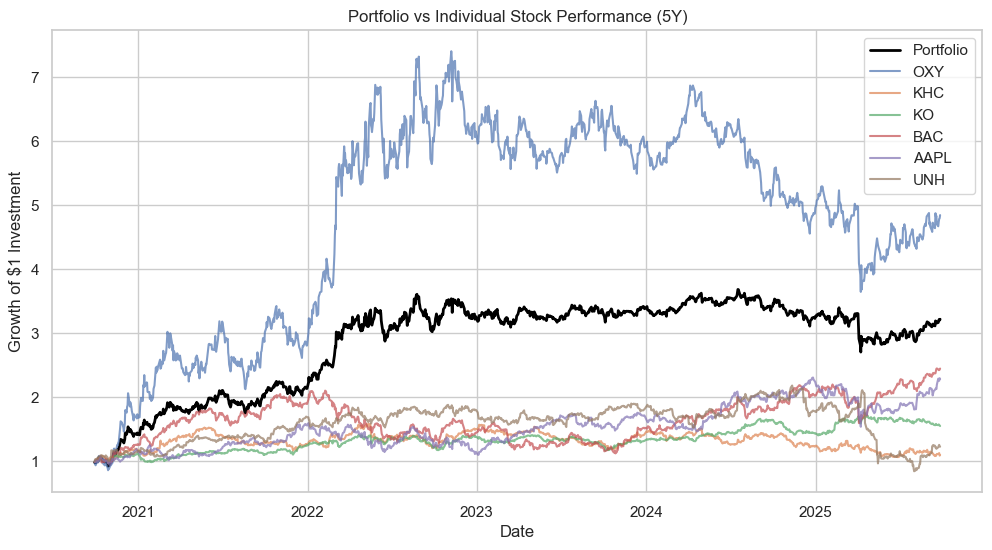

In [8]:
# ---------------------------------
# Step 5 – Visualizations
# Plot cumulative returns for both portfolio and individual assets.
# ---------------------------------
plt.figure(figsize=(12,6))
plt.plot(cumulative_portfolio, label="Portfolio", linewidth=2, color="black")
for ticker in tickers:
    plt.plot((1 + returns[ticker]).cumprod(), label=ticker, alpha=0.7)
plt.title("Portfolio vs Individual Stock Performance (5Y)")
plt.xlabel("Date")
plt.ylabel("Growth of $1 Investment")
plt.legend()
plt.show()

In [10]:
# ---------------------------------
# Step 6 – Summary Statistics
# This tool simulates a multi-asset portfolio, calculates:
# - Start & End Dates
# - Total Portfolio Return
# - Annualized Volatility
# - Unrealized Gains/Losses per Asset 
# Below is the latest snapshot using Rein's actual portfolio.
# ---------------------------------
summary = {
    "Start Date": data.index.min().strftime("%Y-%m-%d"),
    "End Date": data.index.max().strftime("%Y-%m-%d"),
    "Total Portfolio Return (%)": round((cumulative_portfolio.iloc[-1] - 1) * 100, 2),
    "Annualized Volatility (%)": round(portfolio_returns.std() * (252**0.5) * 100, 2),
}

print("\n--- Portfolio Summary ---")
for k, v in summary.items():
    print(f"{k}: {v}")

print("\n--- Unrealized Gains/Losses ---")
for ticker in portfolio:
    shares = portfolio[ticker]["shares"]
    cost = portfolio[ticker]["cost_basis"]
    market = latest_prices[ticker] * shares
    gain_loss = market - cost
    print(f"{ticker}: {gain_loss:,.2f} USD ({(gain_loss/cost)*100:.2f}%)")


--- Portfolio Summary ---
Start Date: 2020-09-28
End Date: 2025-09-26
Total Portfolio Return (%): 221.91
Annualized Volatility (%): 25.72

--- Unrealized Gains/Losses ---
OXY: -29,131.99 USD (-5.78%)
KHC: -24,941.00 USD (-17.23%)
KO: 5,970.00 USD (4.76%)
BAC: 5,617.00 USD (27.42%)
AAPL: 33,192.00 USD (35.11%)
UNH: 7,969.00 USD (10.21%)


In [11]:
# ---

### 📈 Key Takeaways
# - The **portfolio as a whole** grew by **221.91%** over 5 years.  
# - **Apple (AAPL)** is the top contributor with +35.11% unrealized gain.  
# - **KHC & OXY** are underperforming, dragging down total performance.  
# - Diversification provides resilience — even with a few losers, the portfolio 
# remains strongly profitable.  

# ---